In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("jeu_données.csv")
df

,Région,Vendeur,Produit,Ventes
0,r1,V11,p1,71
1,r1,V11,p2,34
2,r1,V11,p3,91
3,r1,V11,p4,80
4,r1,V11,p5,40
...,...,...,...,...
160,r4,V49,p1,81
161,r4,V49,p2,56
162,r4,V49,p3,70
163,r4,V49,p4,63


           Ventes
count  165.000000
mean    58.624242
std     23.866077
min     20.000000
25%     37.000000
50%     60.000000
75%     81.000000
max     99.000000
  Région  Ventes
0     r1    1504
1     r2    3602
2     r3    1807
3     r4    2760
  Produit  Ventes
0      p1    2187
1      p2    1918
2      p3    1775
3      p4    1978
4      p5    1815


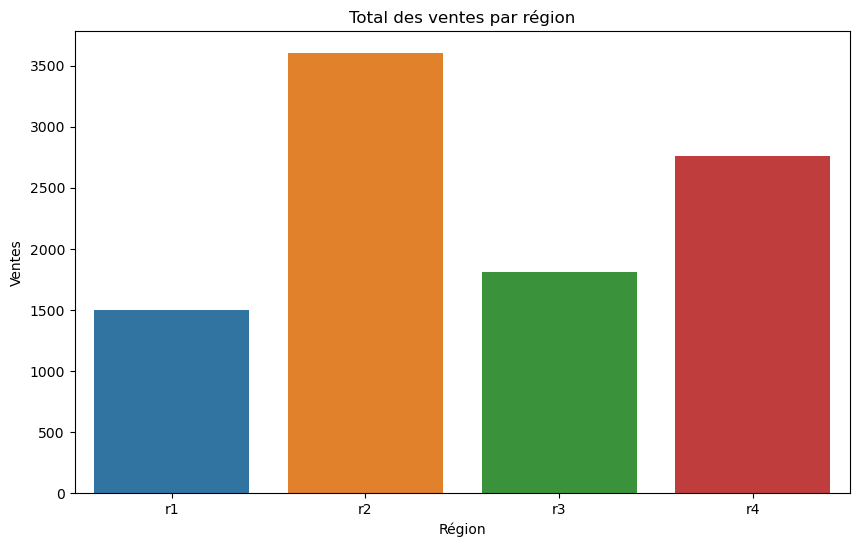

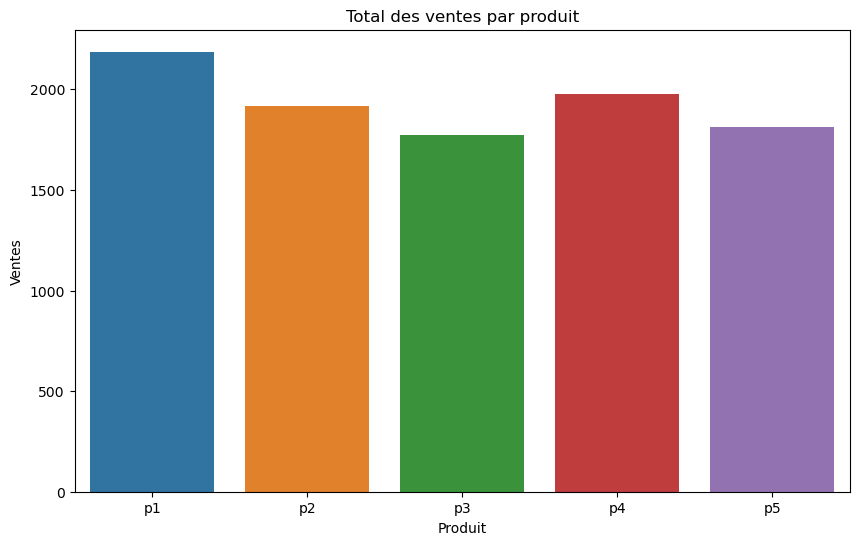

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistiques descriptives
print(df.describe())

# Analyse par région
sales_by_region = df.groupby('Région')['Ventes'].sum().reset_index()
print(sales_by_region)

# Analyse par produit
sales_by_product = df.groupby('Produit')['Ventes'].sum().reset_index()
print(sales_by_product)

# Visualisation des ventes par région
plt.figure(figsize=(10, 6))
sns.barplot(x='Région', y='Ventes', data=sales_by_region)
plt.title('Total des ventes par région')
plt.show()

# Visualisation des ventes par produit
plt.figure(figsize=(10, 6))
sns.barplot(x='Produit', y='Ventes', data=sales_by_product)
plt.title('Total des ventes par produit')
plt.show()

In [6]:
import os
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage

api_key = 'qAOI4c3dA69nZC5UqKp9IVcMNyt5kY6O'
model = "mistral-large-latest"

client = MistralClient(api_key=api_key)

chat_response = client.chat(
    model=model,
    messages=[ChatMessage(role="user", content=f""" Voici les données d'analyse des ventes :
1. Total des ventes par région : {sales_by_region.to_dict()}
2. Total des ventes par produit : {sales_by_product.to_dict()}

Générez un rapport détaillé décrivant les résultats de cette analyse. Incluez des points importants et des observations clés.
""")]
)

print(chat_response.choices[0].message.content)

### Rapport d'Analyse des Ventes

#### Introduction
Ce rapport présente une analyse détaillée des ventes par région et par produit. Les données fournies permettent d'identifier les tendances et les performances des différentes régions et produits.

#### Total des Ventes par Région

| Région | Ventes |
|--------|--------|
| r1     | 1504   |
| r2     | 3602   |
| r3     | 1807   |
| r4     | 2760   |

#### Observations Clés
1. **Région r2** : La région r2 a enregistré les ventes les plus élevées avec un total de 3602 unités. Cela représente une performance significativement supérieure par rapport aux autres régions.
2. **Région r1** : La région r1 a les ventes les plus faibles avec 1504 unités. Cela pourrait indiquer une opportunité d'amélioration ou des défis spécifiques dans cette région.
3. **Région r4** : La région r4 a des ventes relativement élevées avec 2760 unités, ce qui la place en deuxième position.
4. **Région r3** : La région r3 a des ventes modérées avec 1807 unités, se si